In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import pickle
import import_ipynb
import sys
sys.path.append('./../../')
import statsmodels.api as sm
import Portfolio_value as pv

In [2]:
df = pd.read_csv('./../../data/data.csv')

In [3]:
p_val = np.load('./../../result/p_val/p_val_const.npy', allow_pickle=True)
w_val = np.load('./../../result/w_val/w_val_const.npy', allow_pickle=True)

p_val = p_val.reshape(1)
p_val = p_val[0]

w_val = w_val.reshape(1)
w_val = w_val[0]

In [4]:
upper_year = 30
k = 0.5
init_wealth = 350000
print('limit:', 2023-upper_year-1)

limit: 1992


In [5]:

withdraw_rates = [0.04,0.06,0.08]


x = {}
long = {}
for withdraw_rate in withdraw_rates:
    x_ = []
    long_ = []
    for year in list(np.arange(1980,2023-upper_year)):
        print(year)
        x_.append(year)
        res = pv.get_metric(year, k, upper_year, withdraw_rate, df, init_wealth, p_val, w_val)
        long_.append(res[2] / 12)
        
    x[withdraw_rate] = x_
    long[withdraw_rate] = long_


1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992


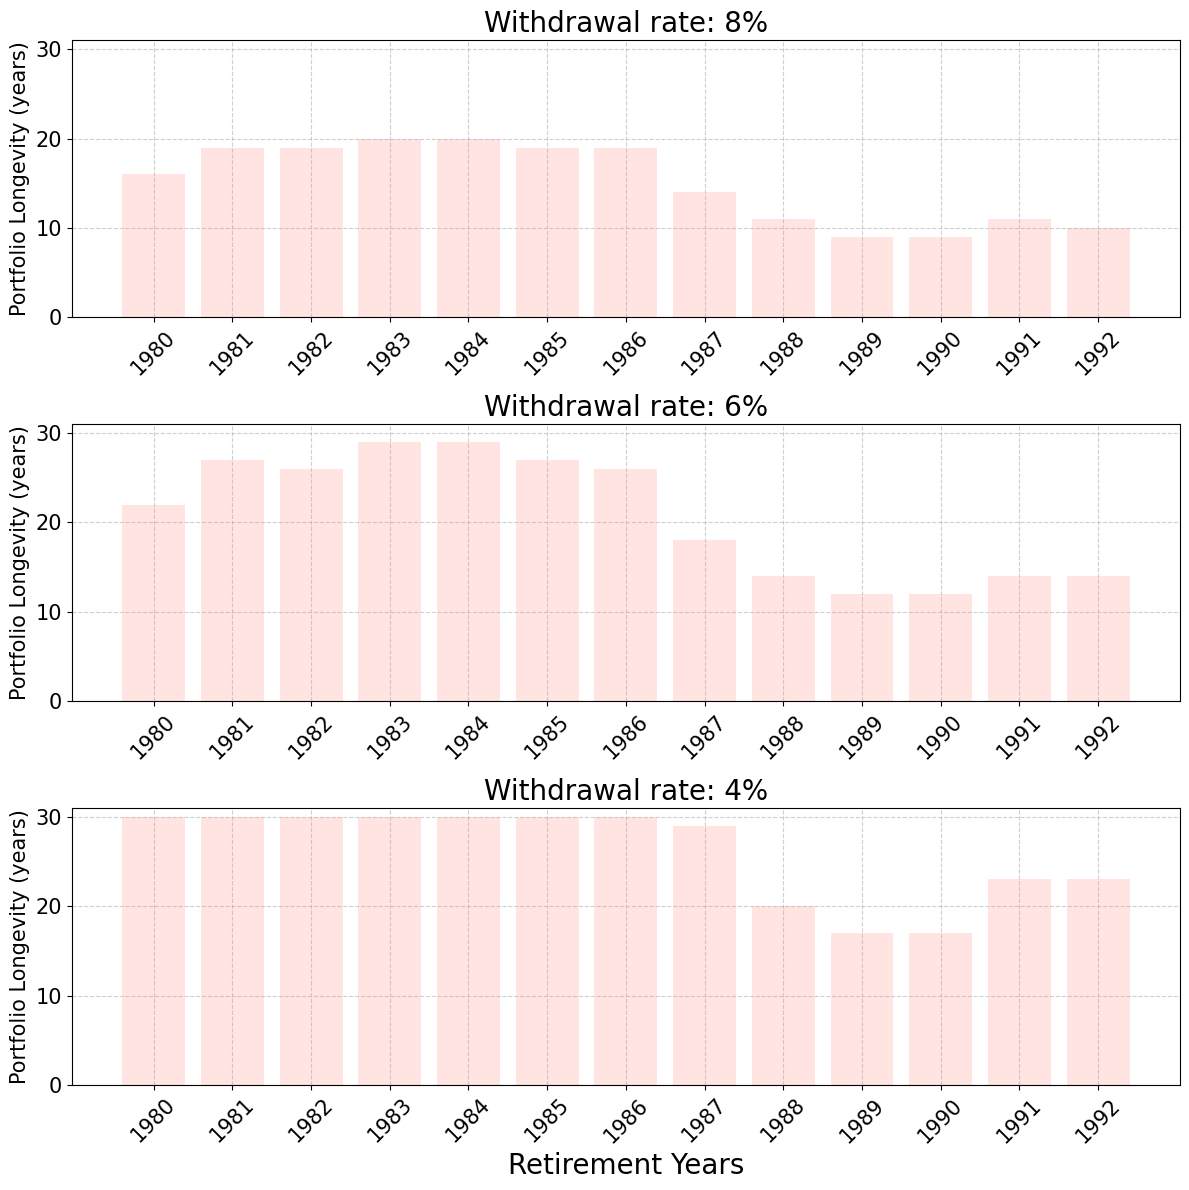

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = {k: [int(i) for i in v] for k, v in x.items()}

fig, axs = plt.subplots(3, figsize=(12,12))

up_lim = int('{}'.format(upper_year))+1

axs[2].set_ylim([0, up_lim])
axs[2].bar(x[0.04], long[0.04], color='mistyrose')
axs[2].set_title('Withdrawal rate: 4%', size=20)
axs[2].set_xlabel('Retirement Years', size=20)
axs[2].set_ylabel('Portfolio Longevity (years)', size=15) 
axs[2].tick_params(axis='both', labelsize=15)
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
axs[2].set_xticks(x[0.04])
axs[2].grid(True, linestyle='--', alpha=0.6)

axs[1].set_ylim([0, up_lim])
axs[1].bar(x[0.06], long[0.06], color='mistyrose')
axs[1].set_title('Withdrawal rate: 6%', size=20)
# axs[1].set_xlabel('Retirement Years', size=20)
axs[1].set_ylabel('Portfolio Longevity (years)', size=15)
axs[1].set_xticks(x[0.06])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].grid(True, linestyle='--', alpha=0.6)
    
axs[0].set_ylim([0, up_lim])
axs[0].bar(x[0.08], long[0.08], color='mistyrose')
axs[0].set_title('Withdrawal rate: 8%', size=20)
# axs[2].set_xlabel('Retirement Years', size=20)
axs[0].set_ylabel('Portfolio Longevity (years)', size=15)
axs[0].set_xticks(x[0.08])
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
axs[0].tick_params(axis='both', labelsize=15)
axs[0].grid(True, linestyle='--', alpha=0.6)

# axs[0].set_ylim([0, up_lim])
# axs[0].bar(x[0.10], long[0.10], color='mistyrose')
# axs[0].set_title('Withdrawal rate: 10%', size=20)
# # axs[0].set_xlabel('Retirement Years', size=20)
# axs[0].set_ylabel('Portfolio Longevity (months)', size=15)
# axs[0].set_xticks(x[0.10])
# axs[0].tick_params(axis='both', labelsize=15)
# plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
# axs[0].grid(True, linestyle='--', alpha=0.6)

formatter = ticker.FuncFormatter(lambda x, pos: '{:d}'.format(int(x)))

# Set the formatter for each axis
for ax in axs.flat:
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("./longevity_{}.eps".format(upper_year), format="eps", bbox_inches="tight")
plt.show()


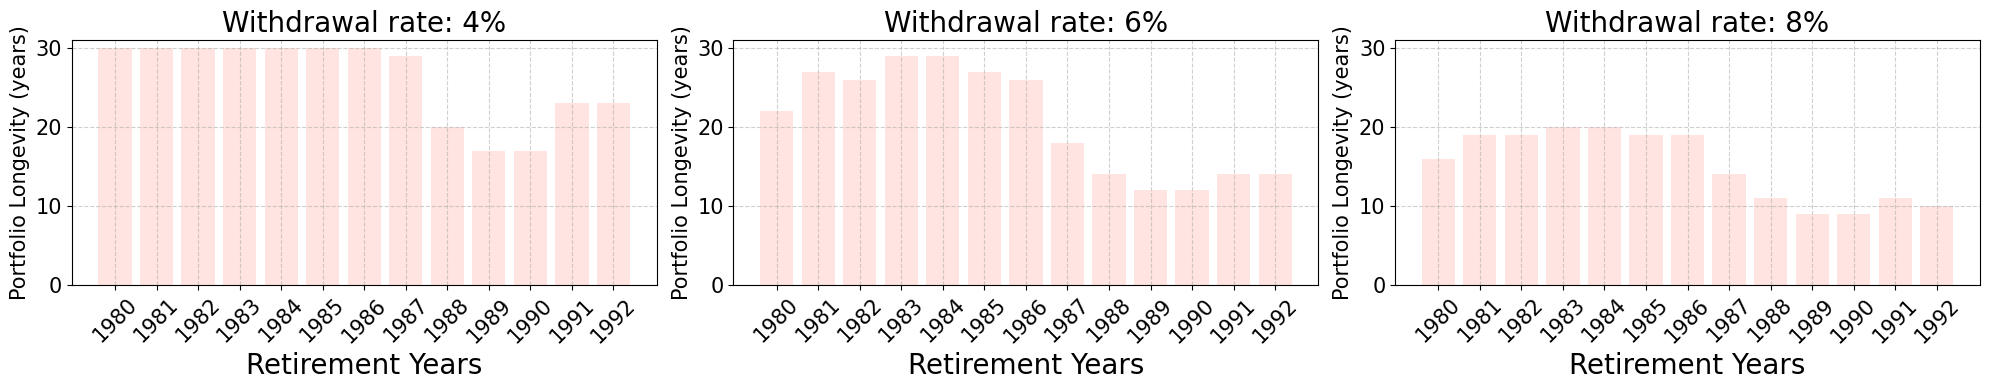

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = {k: [int(i) for i in v] for k, v in x.items()}

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(20,4))

up_lim = int('{}'.format(upper_year))+1

# Adjust the indexing of axs for a 1x3 layout
axs[0].set_ylim([0, up_lim])
axs[0].bar(x[0.04], long[0.04], color='mistyrose')
axs[0].set_title('Withdrawal rate: 4%', size=20)
axs[0].set_xlabel('Retirement Years', size=20)
axs[0].set_ylabel('Portfolio Longevity (years)', size=15)
axs[0].tick_params(axis='both', labelsize=15)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
axs[0].set_xticks(x[0.04])
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].set_ylim([0, up_lim])
axs[1].bar(x[0.06], long[0.06], color='mistyrose')
axs[1].set_title('Withdrawal rate: 6%', size=20)
axs[1].set_xlabel('Retirement Years', size=20)
axs[1].set_ylabel('Portfolio Longevity (years)', size=15)
axs[1].set_xticks(x[0.06])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].grid(True, linestyle='--', alpha=0.6)

axs[2].set_ylim([0, up_lim])
axs[2].bar(x[0.08], long[0.08], color='mistyrose')
axs[2].set_title('Withdrawal rate: 8%', size=20)
axs[2].set_xlabel('Retirement Years', size=20)
axs[2].set_ylabel('Portfolio Longevity (years)', size=15)
axs[2].set_xticks(x[0.08])
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
axs[2].tick_params(axis='both', labelsize=15)
axs[2].grid(True, linestyle='--', alpha=0.6)

formatter = ticker.FuncFormatter(lambda x, pos: '{:d}'.format(int(x)))

# Set the formatter for each axis
for ax in axs:
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("./longevity_{}.eps".format(upper_year), format="eps", bbox_inches="tight")
plt.show()


In [8]:
year_print = ''
for year in list(np.arange(1980,2023-upper_year)):
    year_print = year_print + ' & ' + str(year)
print(year_print)

for withdraw_rate in withdraw_rates:
    long_print = 'withdraw_rate: ' + str(withdraw_rate) + ' '
    for i, year in enumerate(list(np.arange(1980,2023-upper_year))):
        long_print = long_print + ' & ' + str(long[withdraw_rate][i])
    print(long_print)

 & 1980 & 1981 & 1982 & 1983 & 1984 & 1985 & 1986 & 1987 & 1988 & 1989 & 1990 & 1991 & 1992
withdraw_rate: 0.04  & 30.0 & 30.0 & 30.0 & 30.0 & 30.0 & 30.0 & 30.0 & 29.0 & 20.0 & 17.0 & 17.0 & 23.0 & 23.0
withdraw_rate: 0.06  & 22.0 & 27.0 & 26.0 & 29.0 & 29.0 & 27.0 & 26.0 & 18.0 & 14.0 & 12.0 & 12.0 & 14.0 & 14.0
withdraw_rate: 0.08  & 16.0 & 19.0 & 19.0 & 20.0 & 20.0 & 19.0 & 19.0 & 14.0 & 11.0 & 9.0 & 9.0 & 11.0 & 10.0
